## Nathan Butler | 1001805566

In [1]:
import pandas as pd
import matplotlib.pyplot as plt

data = pd.read_csv('Car-1.csv')

## 1.) Importing Data

### First five rows of the dataset.

In [2]:
data.head(5)

,model,year,transmission,mileage,fuelType,tax,mpg,engineSize,price
0,Fiesta,2017,Automatic,15944,Petrol,150,57.7,1.0,12000
1,Focus,2018,Manual,9083,Petrol,150,57.7,1.0,14000
2,Focus,2017,Manual,12456,Petrol,150,57.7,1.0,13000
3,Fiesta,2019,Manual,10460,Petrol,145,40.3,1.5,17500
4,Fiesta,2019,Automatic,1482,Petrol,145,48.7,1.0,16500


### Checking for missing values.

In [3]:
def count_missing(dataframe):
    return {
        "total_missing": dataframe.isna().sum().sum(),
        "missing_by_column": dataframe.isna().sum()
    }
count_missing(data)

{'total_missing': 0,
 'missing_by_column': model           0
 year            0
 transmission    0
 mileage         0
 fuelType        0
 tax             0
 mpg             0
 engineSize      0
 price           0
 dtype: int64}

#### In conlusion, there are no missing cells.

## 2.) Descriptive Statistics

In [4]:
### Summary of the dataset

In [5]:
data.describe()

,year,mileage,tax,mpg,engineSize,price
count,17966.000000,17966.000000,17966.000000,17966.000000,17966.000000,17966.000000
mean,2016.866470,23362.608761,113.329456,57.906980,1.350807,12279.534844
std,2.050336,19472.054349,62.012456,10.125696,0.432367,4741.343657
min,1996.000000,1.000000,0.000000,20.800000,0.000000,495.000000
25%,2016.000000,9987.000000,30.000000,52.300000,1.000000,8999.000000
50%,2017.000000,18242.500000,145.000000,58.900000,1.200000,11291.000000
75%,2018.000000,31060.000000,145.000000,65.700000,1.500000,15299.000000
max,2060.000000,177644.000000,580.000000,201.800000,5.000000,54995.000000


In [6]:
#### Note: The data looks good. I did not find any peculiarities.

In [7]:
data.columns

Index(['model', 'year', 'transmission', 'mileage', 'fuelType', 'tax', 'mpg',
       'engineSize', 'price'],
      dtype='object')

# 3.) Visualizations

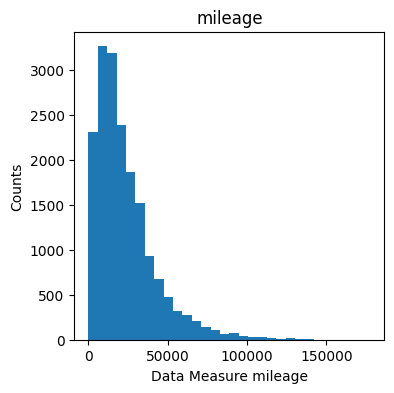

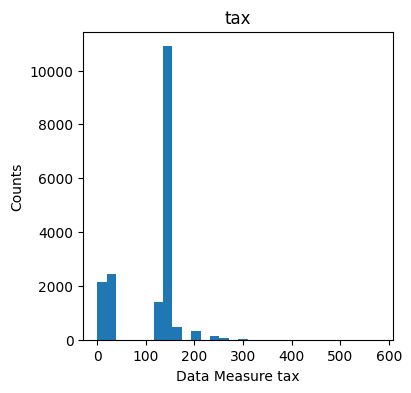

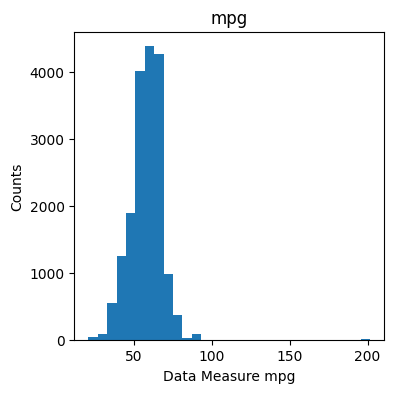

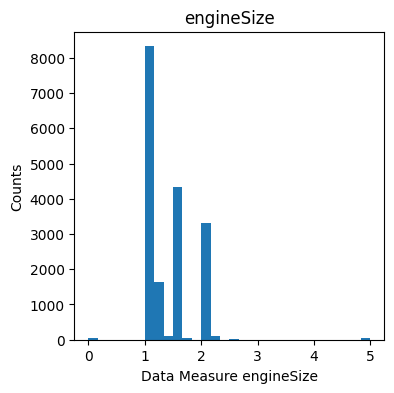

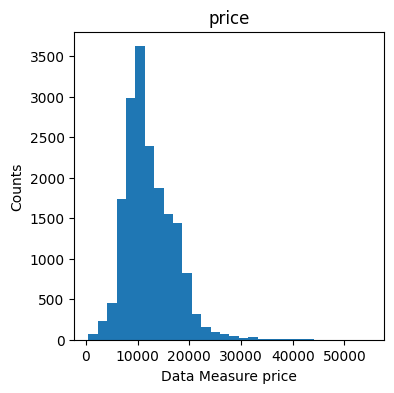

In [14]:
col_list = ['mileage', 'tax', 'mpg', 'engineSize', 'price']
def matplot(data, col_list):
    for col in col_list:
        plt.figure(figsize=(4,4))
        plt.title(col)
        plt.hist(data[col], bins=30)
        plt.xlabel(f"Data Measure {col}")
        plt.ylabel("Counts")
        plt.show()
matplot(data, col_list)

### Notes:
>#### Mileage is right skewed, which indicates that most of the vehicles have lower mileage on average.
>#### Tax has an outlier around 150, with a majority of the vehicles being in that range (in the ten thousands).
>#### Mpg is right-skewed and normally distributed, showing that the average mpg is at ~50mpg.
>#### Engine size shows some variability, the distribution is somewhat left-skewed.
>#### Price is left-skewed with an average of around $10,000.

# 4.) Data Preprocessing

### There are no missing values in this dataset.

### Converting categorical variables into numerical, using label encoding.

In [9]:
col_list = ['model', 'transmission', 'fuelType']
def label_encoding(data, col_list):
    data = data.copy()
    # We create a map to hold the idx, and unique case values.
    loc_map = {} 
    for col in col_list:
        for idx, case in enumerate(data[col].unique()):
            loc_map[case] = idx
        data[col] = data[col].map(loc_map)
    return data
label_enc = label_encoding(data, col_list)
print("Converted cat columns to numerical")
label_enc

Converted cat columns to numerical


,model,year,transmission,mileage,fuelType,tax,mpg,engineSize,price
0,0,2017,0,15944,0,150,57.7,1.0,12000
1,1,2018,1,9083,0,150,57.7,1.0,14000
2,1,2017,1,12456,0,150,57.7,1.0,13000
3,0,2019,1,10460,0,145,40.3,1.5,17500
4,0,2019,0,1482,0,145,48.7,1.0,16500
...,...,...,...,...,...,...,...,...,...
17961,10,2017,1,16700,0,150,47.1,1.4,8999
17962,10,2014,1,40700,0,30,57.7,1.0,7499
17963,1,2015,1,7010,1,20,67.3,1.6,9999
17964,14,2018,1,5007,0,145,57.7,1.2,8299


### Standardizing numerical columns using z-scores

In [10]:
col_list = ['mileage', 'tax', 'mpg', 'engineSize', 'price']
def standardize(data, target_col):
    data = data.copy()
    for col in data[target_col]:
        z_score = (data[col] - data[col].mean()) / data[col].std(ddof=0)
        data[col] = z_score
    return data
z_scores = standardize(label_enc, col_list)
z_scores

,model,year,transmission,mileage,fuelType,tax,mpg,engineSize,price
0,0,2017,0,-0.380998,0,0.591358,-0.020442,-0.811386,-0.058959
1,1,2018,1,-0.733359,0,0.591358,-0.020442,-0.811386,0.362875
2,1,2017,1,-0.560132,0,0.591358,-0.020442,-0.811386,0.151958
3,0,2019,1,-0.662640,0,0.510727,-1.738890,0.345070,1.101082
4,0,2019,0,-1.123724,0,0.510727,-0.909294,-0.811386,0.890166
...,...,...,...,...,...,...,...,...,...
17961,10,2017,1,-0.342172,0,0.591358,-1.067312,0.113779,-0.691919
17962,10,2014,1,0.890398,0,-1.343791,-0.020442,-0.811386,-1.008294
17963,1,2015,1,-0.839822,1,-1.505053,0.927668,0.576362,-0.481003
17964,14,2018,1,-0.942690,0,0.510727,-0.020442,-0.348804,-0.839561


# Part 2.) Regression Models

## 1.) Multiple Linear Regression

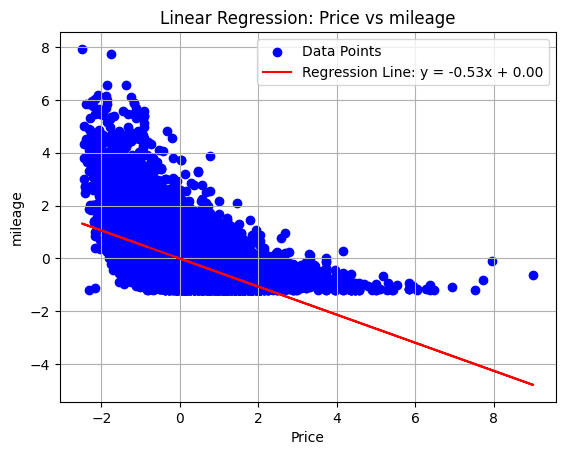

R-Squared:  0.28159910295661983
RMSE:  0.8475853331926999
Adjusted R-squared:  0.28155911181338655


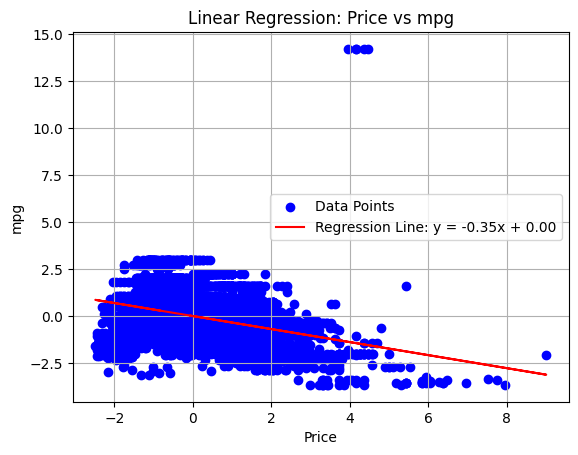

R-Squared:  0.1200064498669362
RMSE:  0.9380797141677588
Adjusted R-squared:  0.1199574633633661


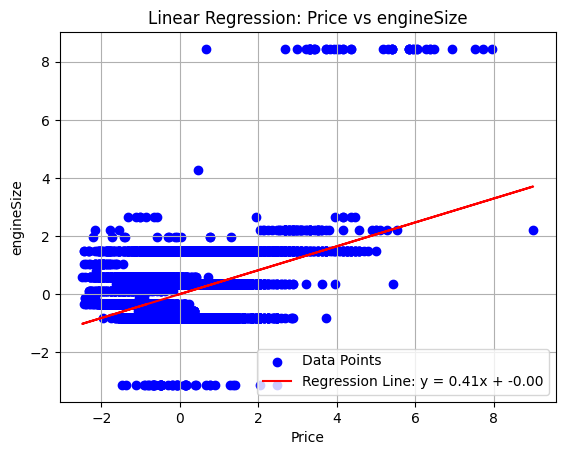

R-Squared:  0.16906741998593744
RMSE:  0.9115550340018219
Adjusted R-squared:  0.16902116455396154


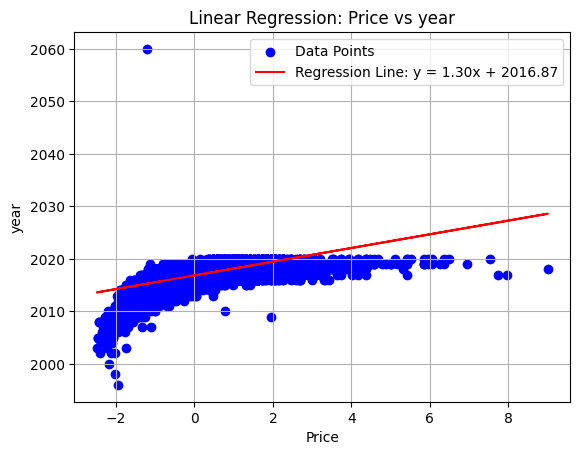

R-Squared:  0.40450788113635694
RMSE:  1.5821620190490546
Adjusted R-squared:  0.40447473194247674


In [17]:
import numpy as np
def lin_reg(data, comparison_list):
    for col in comparison_list:
        # Our explanatory.
        x=data['price']
        # Our response.
        y=data[col]
        m, b = np.polyfit(x, y, 1)
        plt.scatter(x, y, color='blue', label='Data Points')
        plt.plot(x, m*x + b, color='red', label=f'Regression Line: y = {m:.2f}x + {b:.2f}')
        plt.xlabel('Price')
        plt.ylabel(col)
        plt.title(f'Linear Regression: Price vs {col}')
        plt.legend()
        filename = f"regression_price_vs_{col}.png"
        plt.savefig(filename, dpi=300, bbox_inches='tight')
        plt.grid(True)
        plt.show()
        
        y_hat = m * x + b
        residuals = y - y_hat

        # RMSE
        rmse = np.sqrt(np.mean(residuals**2))

        # R-squared
        ss_res = np.sum(residuals**2)
        ss_tot = np.sum((y - np.mean(y))**2)
        r_squared = 1 - (ss_res / ss_tot)

        # Adjusted R-squared
        n = len(y)
        p = 1  # one predictor
        adj_r_squared = 1 - ((1 - r_squared) * (n - 1) / (n - p - 1))
        print("R-Squared: ", r_squared)
        print("RMSE: ", rmse)
        print("Adjusted R-squared: ", adj_r_squared)
        

col_list = ['mileage', 'mpg', 'engineSize', 'year']
lin_reg(z_scores, col_list)

### Polynomial Regression

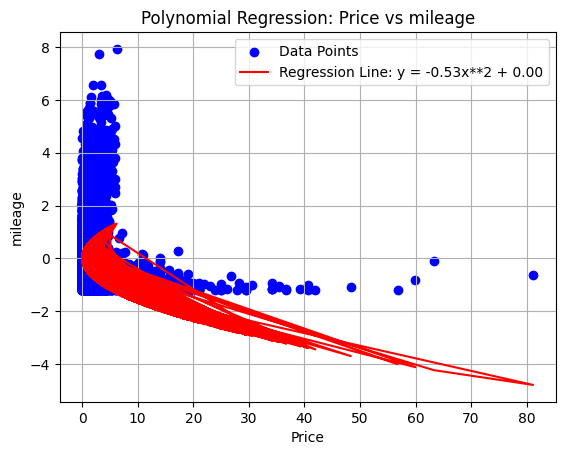

R-Squared:  0.28159910295661983
RMSE:  0.8475853331926999
Adjusted R-squared:  0.28155911181338655


In [18]:
import numpy as np
def lin_reg(data, comparison_list):
    for col in comparison_list:
        # Our explanatory.
        x=data['price']
        # Our response.
        y=data[col]
        m, b = np.polyfit(x, y, 1)
        plt.scatter(x**2, y, color='blue', label='Data Points')
        plt.plot(x**2, m*x + b, color='red', label=f'Regression Line: y = {m:.2f}x**2 + {b:.2f}')
        plt.xlabel('Price')
        plt.ylabel(col)
        plt.title(f'Polynomial Regression: Price vs {col}')
        filename = f"Polynomial_regression_price_vs_{col}.png"
        plt.savefig(filename, dpi=300, bbox_inches='tight')
        plt.legend()
        plt.grid(True)
        plt.show()
        
        y_hat = m * x + b
        residuals = y - y_hat

        # RMSE
        rmse = np.sqrt(np.mean(residuals**2))

        # R-squared
        ss_res = np.sum(residuals**2)
        ss_tot = np.sum((y - np.mean(y))**2)
        r_squared = 1 - (ss_res / ss_tot)

        # Adjusted R-squared
        n = len(y)
        p = 1  # one predictor
        adj_r_squared = 1 - ((1 - r_squared) * (n - 1) / (n - p - 1))
        print("R-Squared: ", r_squared)
        print("RMSE: ", rmse)
        print("Adjusted R-squared: ", adj_r_squared)
        

col_list = ['mileage']
lin_reg(z_scores, col_list)

### Evaluation:
>#### There is nothing significant.

### Hyper-parameter Tuning

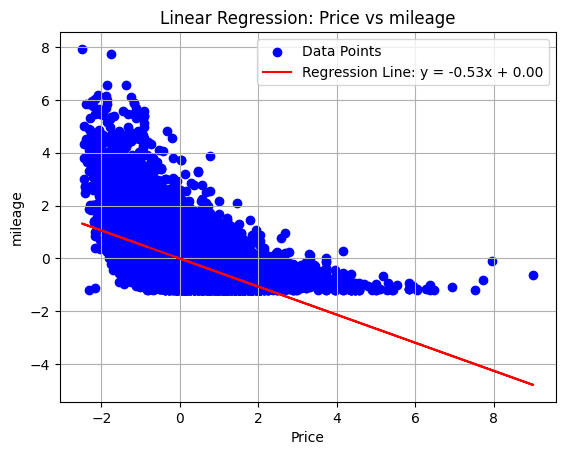

R-Squared:  0.28159910295661983
RMSE:  0.8475853331926999
Adjusted R-squared:  0.28155911181338655


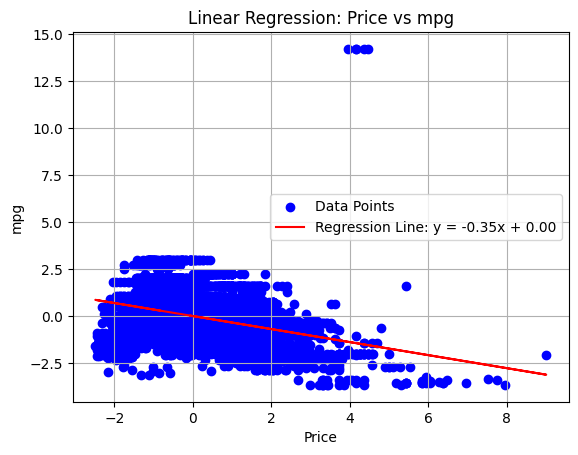

R-Squared:  0.1200064498669362
RMSE:  0.9380797141677588
Adjusted R-squared:  0.1199574633633661


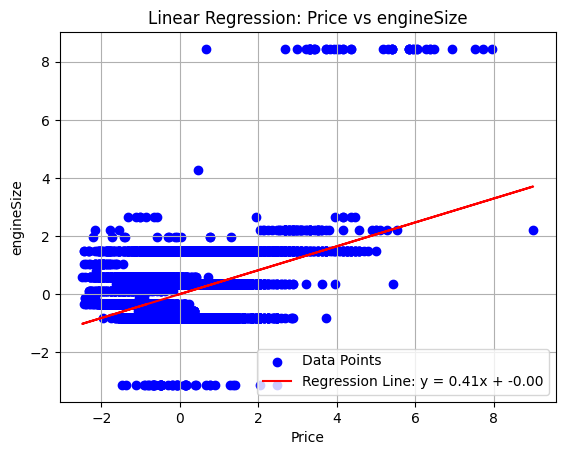

R-Squared:  0.16906741998593744
RMSE:  0.9115550340018219
Adjusted R-squared:  0.16902116455396154


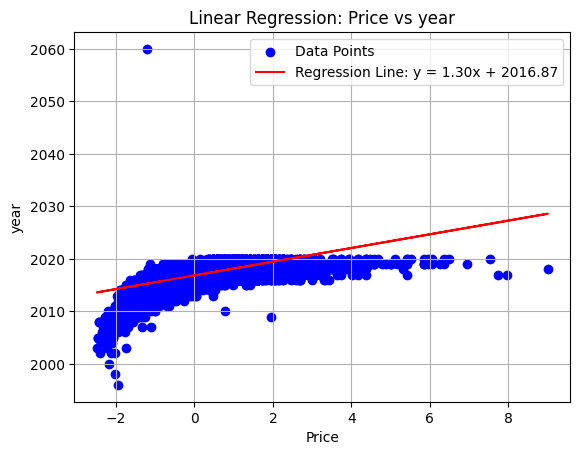

R-Squared:  0.40450788113635694
RMSE:  1.5821620190490546
Adjusted R-squared:  0.40447473194247674


In [13]:
import numpy as np
def lin_reg(data, comparison_list, poly=0):
    for col in comparison_list:
        # Our explanatory.
        x=data['price']
        # Our response.
        y=data[col]
        m, b = np.polyfit(x, y, 1)
        plt.scatter(x, y, color='blue', label='Data Points')
        plt.plot(x, m*x + b, color='red', label=f'Regression Line: y = {m:.2f}x + {b:.2f}')
        plt.xlabel('Price')
        plt.ylabel(col)
        plt.title(f'Linear Regression: Price vs {col}')
        plt.legend()
        plt.grid(True)
        plt.show()
        
        y_hat = m * x + b
        residuals = y - y_hat

        # RMSE
        rmse = np.sqrt(np.mean(residuals**2))

        # R-squared
        ss_res = np.sum(residuals**2)
        ss_tot = np.sum((y - np.mean(y))**2)
        r_squared = 1 - (ss_res / ss_tot)

        # Adjusted R-squared
        n = len(y)
        p = 1  # one predictor
        adj_r_squared = 1 - ((1 - r_squared) * (n - 1) / (n - p - 1))
        print("R-Squared: ", r_squared)
        print("RMSE: ", rmse)
        print("Adjusted R-squared: ", adj_r_squared)
        

col_list = ['mileage', 'mpg', 'engineSize', 'year']
lin_reg(z_scores, col_list, poly=3)

## Which degree yields the best performance?
>#### I am unsure.

# Part 3.) Decision Tree Regression
>#### N/A

# Part 4.) Conclusion and Model Evaluation
>#### N/A